## Modeling<a id='Modeling'>

## Contents<a id='Contents'></a>
* [Modeling](#Modeling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load Data](#Load_Data)
  * [Predict_probablities](#predict_proba)
  * [Defining Thresholds](#define_thresholds)
  * [Optimal Threshold](#optimal_threshold)
  * [roc_auc_score and ROC Curve](#roc_related)

### Introduction<a id='Introduction'>

* In the first round of
the modeling notebook use the probability output and
a threshold other than 0.5, which is the default.
* I am choosing binary model first.<br/>
<b>We will follow the same pattern we used before, only this time we are explicitly defining two objects ``X`` and ``y``, which were defined implicitly when we built the first model</b>. 

    
Thus, pattern defined above can be expanded as follows:

> (a) Define ``X`` and ``y``  

> (b) Perform train/test split on ``(X, y)``  

> (c) Create an object of the class associated with the algorithm to be used--in this case ``LogisticRegression``  

> (d) Build an actual model using the``fit`` method from the class associated with the algorithm 
to be used (using the training set)  

> (e) Predict with the built model using the``predict`` method from the class (training set and test set)  

> (f) Compute performance metrics (in this case, accuracy) for the training and test predictions. The metrics to be used and their interpretation will depend on the application at hand  

> (g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning  

> (h) Compare and Combine all best models as needed

### Imports<a id='Imports'>

In [77]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from library.sb_utils import save_file

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import nltk
# Remove tokens that do not contain any letters from words_tokenized
import re
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from numpy import arange
from numpy import argmax
#
print("Loaded Libraries")
import warnings
warnings.simplefilter("ignore")

Loaded Libraries


### Load Data<a id='Load_Data'>

In [8]:
df_main = pd.read_csv('cp2_ppt_2_sentiment_df.csv')

In [9]:
df_main.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length
0,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",WeTHLEdLdP3Y3AXWWCsx4g,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614
1,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",MrWpfvjVA6Qtj3CDvFfPiA,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573
2,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",hll3PKZbMbu2W7uFbF8ezQ,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362
3,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",Mi5lScAdCWuJZj0QO_4qxg,wG77jgwRg53rN1KVxo637w,2,0,0,0,"It's extremely overpriced, and the sandwiches ...",2018-02-11 18:04:01,2018,254
4,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",SSu94Tvc6L5UBC4FDDyAbw,5s0nTuLRm3ue4Qfrj9PHkQ,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018,1167


In [10]:
# Create new column "target_binary" that stored 0's or 1's. 0 being Positive, 1 being Non-Positive
df_main["target_binary"] = np.where(df_main["yelp_review_stars"] >= 3, 0, 1)
df_main.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,...,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length,target_binary
0,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614,0
1,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573,0
2,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362,1


In [16]:
# Picking the only text and target column
df_bi_final = df_main[['text','target_binary']]

In [17]:
df_bi_final.head()

,text,target_binary
0,We are visiting in Philadelphia from Californi...,0
1,Delicious food ! I personally loved it !!!\n\n...,0
2,Beautiful place. Excellent food. I only gave i...,1
3,"It's extremely overpriced, and the sandwiches ...",1
4,Instagram worthy and Claire is an amazing serv...,0


In [18]:
import re 
def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = re.sub("'s", "", text)   
    return text

In [23]:
# Define a function to perform both stemming and tokenization


def tokenize_and_stem(text):

    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]',token)]

    stems = [stemmer.stem(token) for token in filtered_tokens]

    return stems

In [19]:
# applying the cleaning function to text column
df_bi_final['text'] = df_bi_final['text'].apply(lambda text: function_clean(text))

In [20]:
df_bi_final.head()

,text,target_binary
0,We are visiting in Philadelphia from Californi...,0
1,Delicious food I personally loved it I was sur...,0
2,Beautiful place Excellent food I only gave it ...,1
3,It s extremely overpriced and the sandwiches a...,1
4,Instagram worthy and Claire is an amazing serv...,0


In [21]:
X_train,X_test,y_train,y_test = train_test_split(df_bi_final['text'], df_bi_final['target_binary'], random_state=2, test_size=0.2, stratify = df_bi_final['target_binary'])

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15757,), (3940,), (15757,), (3940,))

In [24]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text

tfidf = TfidfVectorizer(stop_words='english',tokenizer=tokenize_and_stem,ngram_range=(1,1))

In [25]:
X_train_transformed = tfidf.fit_transform(X_train)

In [26]:
type(X_train_transformed)

scipy.sparse.csr.csr_matrix

In [29]:
X_test_transformed = tfidf.transform(X_test)

In [30]:
type(X_test_transformed)

scipy.sparse.csr.csr_matrix

In [36]:
# fit a model
clf = LogisticRegression()
clf.fit(X_train_transformed, y_train)
# predict labels
y_pred = model.predict(X_test_transformed)


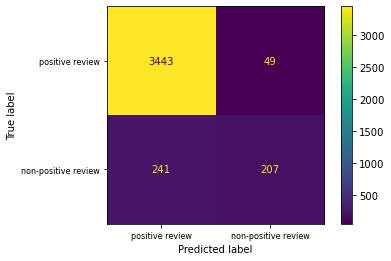

In [38]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['positive review', 'non-positive review'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
ax.set_yticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
display_cm.plot(ax = ax)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3492
           1       0.81      0.46      0.59       448

    accuracy                           0.93      3940
   macro avg       0.87      0.72      0.77      3940
weighted avg       0.92      0.93      0.92      3940



## Predict Probablities<a id='predict_proba'>

In [45]:
y_pred_proba = clf.predict_proba(X_test_transformed)

In [46]:
y_pred_proba

array([[0.97020695, 0.02979305],
       [0.97246781, 0.02753219],
       [0.98977346, 0.01022654],
       ...,
       [0.98245408, 0.01754592],
       [0.11357082, 0.88642918],
       [0.76422428, 0.23577572]])

In [47]:
type(y_pred_proba)

numpy.ndarray

In [51]:
# keep probabilities for the positive outcome only
positive_probs = y_pred_proba[:, 0]

In [52]:
positive_probs

array([0.97020695, 0.97246781, 0.98977346, ..., 0.98245408, 0.11357082,
       0.76422428])

In [53]:
# keep probabilities for the negative outcome only
negative_probs = y_pred_proba[:, 1]

In [54]:
negative_probs

array([0.02979305, 0.02753219, 0.01022654, ..., 0.01754592, 0.88642918,
       0.23577572])

## Defining Thresholds<a id='define_thresholds'>

In [57]:
# define thresholds
thresholds = arange(0, 1, 0.001)

In [62]:

# apply threshold to positive probabilities to create labels
def to_labels(probs, threshold):
 return (probs >= threshold).astype('int')

In [63]:
# evaluate each threshold
scores = [f1_score(y_test, to_labels(positive_probs, t)) for t in thresholds]

In [61]:
scores

[0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2041932543299909,
 0.2037839069979485,
 0.2037839069979485,
 0.2037839069979485,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.20337437300501596,
 0.2029646522234892,
 0.2029646522234892,
 0.2029646522234892,
 0.2029646522234892,
 0.2029646522234892,
 0.20255474452554748,
 0.20214464978325353,
 0.20173436786855317,
 0.20173436786855317,
 0.20173436786855317,
 0.20173436786855317,
 0.20173436786855317,
 0.20173436786855317,
 0.20091324200913244,
 0.20091324200913244,
 0.20091324200913244,
 0.20091324200913244,
 0.20091324200913244,
 0.20050239

array index that has the largest score (best F-Measure) and we will have the optimal threshold and its evaluation

## Optimal Threshold<a id='optimal_threshold'>

In [67]:
# get best threshold
array_index = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[array_index], scores[array_index]))

Threshold=0.000, F-Score=0.20419


In [65]:
# evaluate each threshold
neg_scores = [f1_score(y_test, to_labels(negative_probs, t)) for t in thresholds]

In [68]:
# get best threshold
array_index_neg = argmax(neg_scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[array_index_neg], neg_scores[array_index_neg]))

Threshold=0.297, F-Score=0.71183


## roc_auc_score and ROC Curve<a id='roc_related'>

In [69]:

# calculate scores
positive_auc = roc_auc_score(y_test, positive_probs)

In [70]:
positive_auc

0.04265553407789232

In [88]:

# calculate scores
negative_roc_score = roc_auc_score(y_test, negative_probs)
negative_roc_score

0.9573444659221076

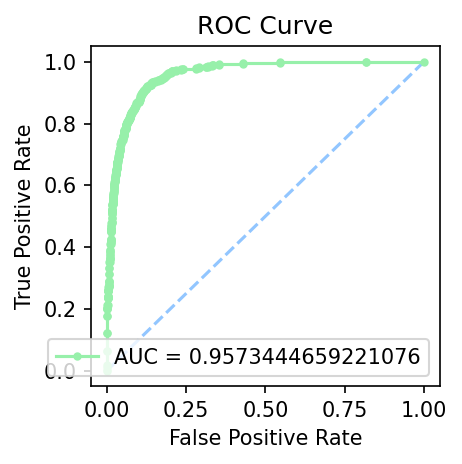

In [94]:
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_proba[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred_proba[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

## Obtain Optimal Probability Thresholds with ROC Curve

In [100]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred_proba[:, 1]]

In [101]:
print(classification_report(y_test, roc_predictions))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3492
           1       0.48      0.92      0.63       448

    accuracy                           0.88      3940
   macro avg       0.74      0.90      0.78      3940
weighted avg       0.93      0.88      0.89      3940



In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3492
           1       0.81      0.46      0.59       448

    accuracy                           0.93      3940
   macro avg       0.87      0.72      0.77      3940
weighted avg       0.92      0.93      0.92      3940

